In [177]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

In [178]:
# Read the file from the Resources Folder
ds_salaries_1 = pd.read_csv("Resources/ds_salaries-1.csv")
ds_salaries_2 = pd.read_csv("Resources/ds_salaries-2.csv")

ds_combined_salaries= pd.concat([ds_salaries_1,ds_salaries_2])
ds_combined_salaries = ds_combined_salaries.drop_duplicates()


# Drop any index column from the combined csv file
ds_combined_salaries = ds_combined_salaries.drop(columns=['Unnamed: 0'])
ds_combined_salaries.count()

work_year             3191
experience_level      3191
employment_type       3191
job_title             3191
salary                3191
salary_currency       3191
salary_in_usd         3191
employee_residence    3191
remote_ratio          3191
company_location      3191
company_size          3191
dtype: int64

In [199]:
us_ds_salaries = ds_combined_salaries[
    (ds_combined_salaries['company_location'] == 'US') &
    (ds_combined_salaries['employee_residence'] == 'US')
]
us_ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [180]:
# Compairison to the US Avg. Salary by year
# Bar graph

In [181]:
us_ds_average_salaries = us_ds_salaries.groupby('work_year')['salary'].mean().map('${:.2f}'.format)
us_ds_average_salaries

work_year
2020    $142183.93
2021    $292877.02
2022    $149844.46
2023    $158459.54
Name: salary, dtype: object

In [182]:
us_ds_average_salaries_df = us_ds_salaries.groupby('work_year')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_average_salaries_df

,average_salary
work_year,
2020,$142183.93
2021,$292877.02
2022,$149844.46
2023,$158459.54


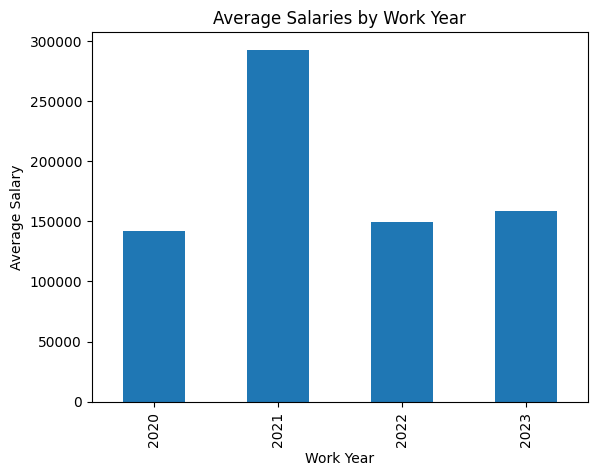

In [183]:
# Because I formatted the inforation to currency I had to remove it in order for the graph to work
us_ds_average_salaries_df['average_salary'] = us_ds_average_salaries_df['average_salary'].str.replace('$', '').astype(float)

us_ds_average_salaries_df.plot(kind='bar', legend=False)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Work Year')
plt.show()

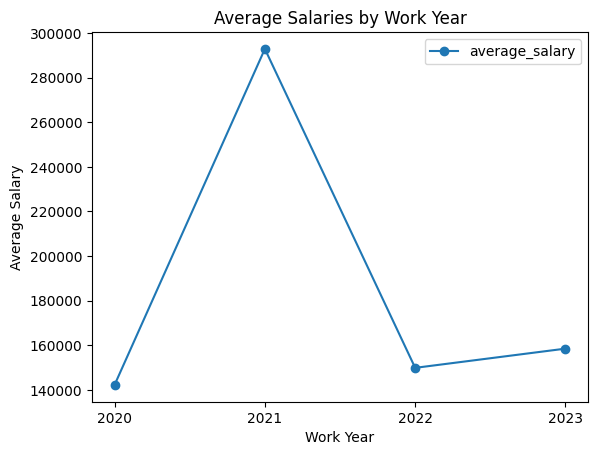

In [197]:
us_ds_average_salaries_df.plot(kind='line', marker='o')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Work Year')
plt.xticks(us_ds_average_salaries_df.index, ['2020', '2021', '2022', '2023'])
plt.show()

In [185]:
job_title_average_salaries = us_ds_salaries.groupby('job_title')['salary'].mean().reset_index()
job_title_average_salaries['salary'] = job_title_average_salaries['salary'].map('${:.2f}'.format)
job_title_average_salaries_sorted = job_title_average_salaries.sort_values('salary')
job_title_average_salaries_sorted = job_title_average_salaries_sorted.reset_index(drop=True)
job_title_average_salaries_sorted

,job_title,salary
0,BI Analyst,$103000.00
1,AI Scientist,$103454.55
2,Staff Data Scientist,$105000.00
3,Business Data Analyst,$107555.56
4,Data Operations Engineer,$110808.33
...,...,...
67,Computer Vision Software Engineer,$75500.00
68,Data Quality Analyst,$79295.00
69,Data Analytics Consultant,$81500.00
70,Data Operations Analyst,$90562.50


In [186]:
# Average salary per work schedule
# Bar Graph

In [187]:
us_emp_type = us_ds_salaries.groupby('employment_type')
us_emp_type.value_counts()

employment_type  work_year  experience_level  job_title                 salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
CT               2020       EN                Business Data Analyst     100000  USD              100000         US                  100           US                L               2
                 2021       EX                Principal Data Scientist  416000  USD              416000         US                  100           US                S               2
                            MI                ML Engineer               270000  USD              270000         US                  100           US                L               2
                            SE                Staff Data Scientist      105000  USD              105000         US                  100           US                M               2
                 2023       MI                ML Engineer               30000   USD            

In [188]:
us_ds_emp_avg = us_ds_salaries.groupby('employment_type')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_emp_avg

,average_salary
employment_type,
CT,$165625.00
FL,$58571.43
FT,$166456.67
PT,$30465.50


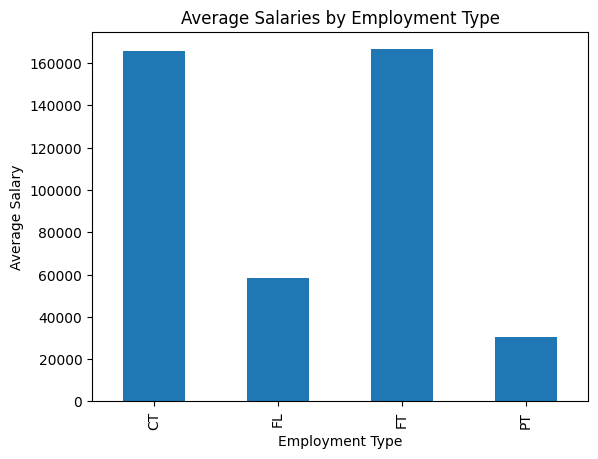

In [189]:
us_ds_emp_avg['average_salary'] = us_ds_emp_avg['average_salary'].str.replace('$', '').str.replace(',', '').astype(float)
us_ds_emp_avg.plot(kind='bar', legend=False)
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Employment Type')
plt.show()

In [190]:
# Company who is paying more
# Bar graph

In [191]:
us_company_size = us_ds_salaries.groupby('company_size')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_company_size

,average_salary
company_size,
L,$246566.48
M,$153843.39
S,$114889.81


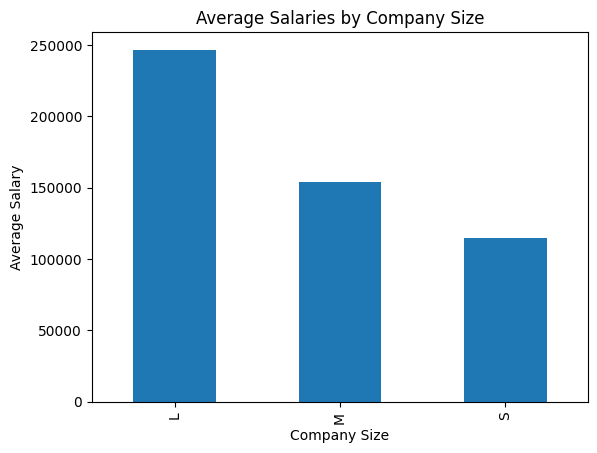

In [192]:
us_company_size['average_salary'] = us_company_size['average_salary'].str.replace('$', '').str.replace(',', '').astype(float)
us_company_size.plot(kind='bar', legend=False)
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Company Size')
plt.show()

In [ ]:
#better to have it and not need it, then need it and not have it

In [193]:
# Work exp compairison
# Bar and line 

In [194]:
us_ds_exp_avg = us_ds_salaries.groupby('experience_level')['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_exp_avg

,average_salary
experience_level,
EN,$97395.67
EX,$211988.73
MI,$182354.38
SE,$165029.70


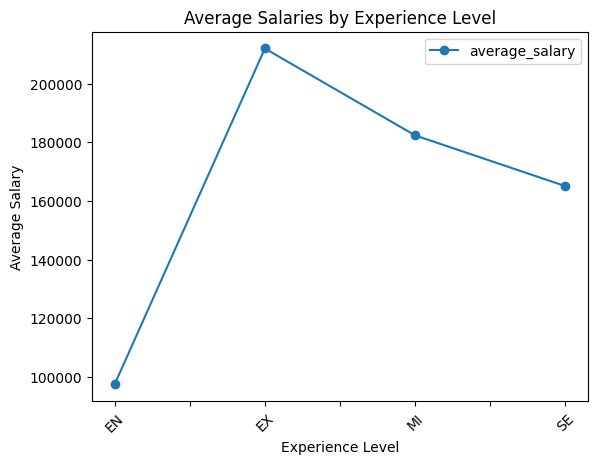

In [195]:
us_ds_exp_avg['average_salary'] = us_ds_exp_avg['average_salary'].str.replace('$', '').astype(float)

us_ds_exp_avg.plot(kind='line', marker='o')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Experience Level')
plt.xticks(rotation=45)
plt.show()

In [213]:
us_ds_exp_year_avg = us_ds_salaries.groupby(['experience_level', 'work_year'])['salary'].mean().map('${:.2f}'.format).to_frame(name='average_salary')
us_ds_exp_year_avg

average_salary
experience_level work_year               
EN               2020          $118000.00
                 2021           $80552.63
                 2022           $93129.79
                 2023          $107829.53
EX               2020          $325000.00
                 2021          $300222.22
                 2022          $195208.14
                 2023          $204880.19
MI               2020          $125200.69
                 2021          $418281.17
                 2022          $138914.68
                 2023          $134585.46
SE               2020          $171275.00
                 2021          $270527.03
                 2022          $154195.32
                 2023          $165775.45

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of labels (4).

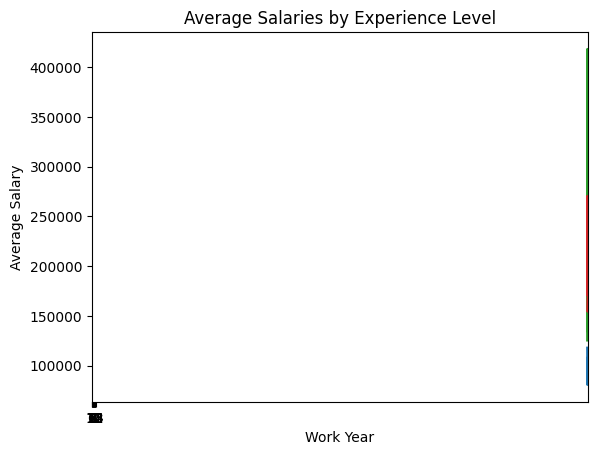

In [212]:

us_ds_exp_year_avg.reset_index(inplace=True)

us_ds_exp_year_avg.reset_index(inplace=True)

for exp_level in us_ds_exp_year_avg['experience_level'].unique():
    data = us_ds_exp_year_avg[us_ds_exp_year_avg['experience_level'] == exp_level]
    plt.plot(data['work_year'], data['average_salary'], label=exp_level)

plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Experience Level')
plt.xticks(us_ds_exp_year_avg.index, ['2020', '2021', '2022', '2023'])
plt.legend()

plt.show()

In [196]:
# Compairing salary stats over the years
